In [1]:
#Imports and set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
print("Libraries imported successfully")

Libraries imported successfully
Dataset successfully loaded


In [2]:
#Following cell is for data loading and cleaning

#Load the dataset from the CSV file
df = pd.read_csv('diabetic_data.csv')
print("Dataset successfully loaded")

df.head()

#Replace all the mostly missing value cells with missing value markers and drop them
df.replace('?', pd.NA, inplace=True)
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
print(df.isnull().sum())

# Map the binary target variable, and replace <30 and >30 to showing 1 is yes (readmitted in 30 days), 
# 0 is no (not readmitted in 30 days) respectively
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
df['readmitted'].value_counts()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Convert categorical data into numbers (One-hot encoding)
categorical_cols = ['race', 'gender', 'age']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,2278392,8222157,6,25,1,1,41,0,1,0,...,False,False,False,False,False,False,False,False,False,False
1,149190,55629189,1,1,7,3,59,0,18,0,...,False,True,False,False,False,False,False,False,False,False
2,64410,86047875,1,1,7,2,11,5,13,2,...,False,False,True,False,False,False,False,False,False,False
3,500364,82442376,1,1,7,2,44,1,16,0,...,False,False,False,True,False,False,False,False,False,False
4,16680,42519267,1,1,7,1,51,0,8,0,...,False,False,False,False,True,False,False,False,False,False


In [10]:
#Selecting features (X) and target (y)

#Make the readmitted column as the target 'y', then select all other ones as 'X' and drop the remaining text columns to keep it simple
y = df['readmitted']
X_numeric = df.select_dtypes(include='number')
X = X_numeric.drop(columns=['encounter_id', 'patient_nbr', 'readmitted'])
print("Features and target selected")

Features and target selected


In [11]:
#Splitting data for training vs testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data successfully split into training and testing sets")

Data successfully split into training and testing sets


In [12]:
#Handling missing values
from sklearn.impute import SimpleImputer

#Create imputer object and fill them in with the median value of each column
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Missing values handled")

Missing values handled


In [16]:
#Training the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced') #1000 iterations, enough to solve the problem 

#Train model
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [17]:
#Making predictions
predictions = model.predict(X_test)
print("Predictions made based on the test data set.")

Predictions made based on the test data set.


Accuracy: 0.68
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80     18083
           1       0.17      0.50      0.26      2271

    accuracy                           0.68     20354
   macro avg       0.55      0.60      0.53     20354
weighted avg       0.83      0.68      0.74     20354

Confusion Matrix:


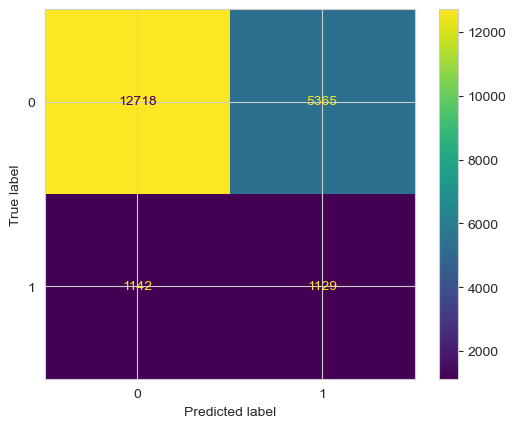

In [18]:
#Checking performance of prediction
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#Calculate and display the classification report, and a confusion matrix
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("-" * 30)

print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)